In [ ]:
import os
import numpy as np
import pandas as pd
import pystan
import csv

In [2]:
os.chdir('/Users/lukefitzpatrick/polling_model_py/')

In [3]:
from stan_polls_helpers import *

In [4]:
Y_clinton, Y_trump, sigma, dates = get_data()

In [5]:
n_chains=1
n_iter=1500

In [ ]:
%%time
fit = None
for name, Y, prior in [('Clinton', Y_clinton, 50.0), ('Trump', Y_trump, 50.0)]:
        stan_dat = {
                   'T': len(Y),
                   'polls': len(Y[0]),
                   'Y': Y,
                   'initial_prior': prior,
                   'sigma': sigma,
                   'rw_sd':0.25
                    }

        fit = fit_stan(stan_dat, n_chains, n_iter, fit)
        get_median_percentile(fit, name, n_iter)

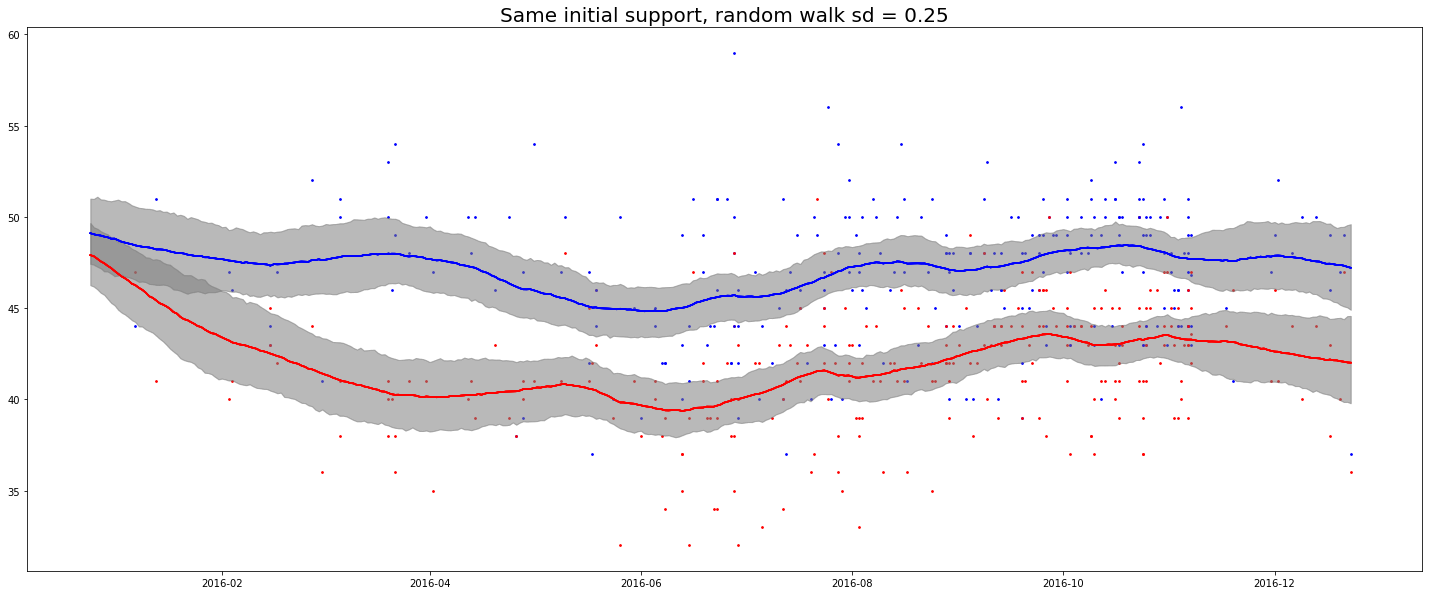

In [6]:
fig = read_n_plot('/Users/lukefitzpatrick/polling_model_py/',
            title='Same initial support, random walk sd = 0.25',
            Y_clinton= Y_clinton,
            Y_trump= Y_trump,
            niter=n_iter,
            dates=dates)

In [8]:
fig.savefig(fname='Same_prior_sd25.png')